## **EXERCISE 4 - ECEN 289**

## **TYLER SMITH**
## **826005315**

## **PART 1 - LOAD & CLEAN DATA**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the CSV file into dataframe

In [ ]:
!ls drive/MyDrive/ECEN289/EXERCISE4/ex4.csv
df = pd.read_csv('drive/MyDrive/ECEN289/EXERCISE4/ex4.csv')
df.info()

drive/MyDrive/ECEN289/EXERCISE4/ex4.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loc x     186 non-null    int64  
 1   lox y     186 non-null    int64  
 2   split     186 non-null    int64  
 3   wid       186 non-null    int64  
 4   vddiddq   186 non-null    float64
 5   power     186 non-null    float64
 6   freq      186 non-null    float64
 7   psro      186 non-null    float64
 8   pw40      168 non-null    float64
 9   ps40      168 non-null    float64
 10  ivd0      186 non-null    float64
 11  ivd1      186 non-null    float64
 12  ivd2      186 non-null    float64
 13  ivd3      186 non-null    float64
 14  ivio      186 non-null    float64
 15  ivsb      186 non-null    float64
 16  ivsr      186 non-null    float64
 17  frq00     186 non-null    float64
 18  frq0      186 non-null    float64
 19  frq6      186 non-null    float

In [ ]:
df = df.dropna(axis=0,how='any')
df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 185
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loc x     168 non-null    int64  
 1   lox y     168 non-null    int64  
 2   split     168 non-null    int64  
 3   wid       168 non-null    int64  
 4   vddiddq   168 non-null    float64
 5   power     168 non-null    float64
 6   freq      168 non-null    float64
 7   psro      168 non-null    float64
 8   pw40      168 non-null    float64
 9   ps40      168 non-null    float64
 10  ivd0      168 non-null    float64
 11  ivd1      168 non-null    float64
 12  ivd2      168 non-null    float64
 13  ivd3      168 non-null    float64
 14  ivio      168 non-null    float64
 15  ivsb      168 non-null    float64
 16  ivsr      168 non-null    float64
 17  frq00     168 non-null    float64
 18  frq0      168 non-null    float64
 19  frq6      168 non-null    float64
 20  frq9      168 non-null    float6

Train, Test, Validation Split

In [ ]:
#importing for train test split
from sklearn.model_selection import train_test_split

In [ ]:
y = df.tstclass.values
X = df.drop(['tstclass'],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(x_train,y_train,test_size=0.25, random_state=42)

In [ ]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)
print("x_validate: ",x_validate.shape)
print("y_validate: ",y_validate.shape)

x_train:  (100, 33)
y_train:  (100,)
x_test:  (34, 33)
y_test:  (34,)
x_validate:  (34, 33)
y_validate:  (34,)


## **Part 2 - Naive Bayes Classifier**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_validate)



In [ ]:
cm=confusion_matrix(y_validate, y_pred)
print('NAIVE BAYES CLASSIFIER: ')
print("Confusion Matrix: ")
print(cm)
print("Accuracy: ",accuracy_score(y_validate,y_pred))
print("f1 Score: ",f1_score(y_validate, y_pred, average='macro'))
print("Precision: ",precision_score(y_validate, y_pred, average='macro'))

NAIVE BAYES CLASSIFIER: 
Confusion Matrix: 
[[16  0  0]
 [ 0 15  0]
 [ 1  0  2]]
Accuracy:  0.9705882352941176
f1 Score:  0.9232323232323232
Precision:  0.9803921568627452


## **PART 3 - KNN**

K = 1 NEAREST NEIGHBOR

In [ ]:
KNN1 = neighbors.KNeighborsClassifier(n_neighbors=1)
KNN1.fit(x_train,y_train)
y_pred = KNN1.predict(x_validate) 

print(y_pred)

[2 2 2 2 2 1 1 1 1 1 2 1 1 2 2 3 1 2 3 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1]


In [ ]:
cm=confusion_matrix(y_validate, y_pred)
print('KNN - 1: ')
print("Confusion Matrix: ")
print(cm)
print("Accuracy: ",accuracy_score(y_validate,y_pred))
print("f1 Score: ",f1_score(y_validate, y_pred, average='macro'))
print("Precision: ",precision_score(y_validate, y_pred, average='macro'))

KNN - 1: 
Confusion Matrix: 
[[16  0  0]
 [ 1 14  0]
 [ 1  0  2]]
Accuracy:  0.9411764705882353
f1 Score:  0.9022312373225153
Precision:  0.9629629629629629


K = 3 NEAREST NEIGHBOR

In [ ]:
KNN3 = neighbors.KNeighborsClassifier(n_neighbors=3)
KNN3.fit(x_train,y_train)
y_pred = KNN3.predict(x_validate)

print(y_pred)

[2 2 2 2 2 1 1 1 1 1 2 1 1 2 2 3 1 2 1 2 2 1 1 2 1 1 1 2 1 2 1 1 2 1]


In [ ]:
cm=confusion_matrix(y_validate, y_pred)
print('KNN - 3: ')
print("Confusion Matrix: ")
print(cm)
print("Accuracy: ",accuracy_score(y_validate,y_pred))
print("f1 Score: ",f1_score(y_validate, y_pred, average='macro'))
print("Precision: ",precision_score(y_validate, y_pred, average='macro'))

KNN - 3: 
Confusion Matrix: 
[[16  0  0]
 [ 0 15  0]
 [ 2  0  1]]
Accuracy:  0.9411764705882353
f1 Score:  0.8137254901960785
Precision:  0.9629629629629629


K = 5 NEAREST NEIGHBOR

In [ ]:
KNN5 = neighbors.KNeighborsClassifier(n_neighbors=5)
KNN5.fit(x_train,y_train)
y_pred = KNN5.predict(x_validate)

print(y_pred)

[2 2 2 2 2 1 2 1 1 1 2 1 1 2 2 3 1 2 1 2 2 1 1 2 1 1 1 2 1 2 1 1 2 1]


In [ ]:
cm=confusion_matrix(y_validate, y_pred)
print('KNN - 5: ')
print("Confusion Matrix: ")
print(cm)
print("Accuracy: ",accuracy_score(y_validate,y_pred))
print("f1 Score: ",f1_score(y_validate, y_pred, average='macro'))
print("Precision: ",precision_score(y_validate, y_pred, average='macro'))

KNN - 5: 
Confusion Matrix: 
[[15  1  0]
 [ 0 15  0]
 [ 2  0  1]]
Accuracy:  0.9117647058823529
f1 Score:  0.7922776148582601
Precision:  0.9399509803921569


THE BEST METHOD FOR BASED ON THE 4 ABOVE, WAS THE NAIVE BAYES CLASSIFIER

NOW USING IT TO PREDICT THE METRICS FOR THE TEST SET

In [ ]:
y_pred = clf.predict(x_test)

cm=confusion_matrix(y_validate, y_test)
print('NBC WITH TEST SET: ')
print("Confusion Matrix: ")
print(cm)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1 Score: ",f1_score(y_test, y_pred, average='macro'))
print("Precision: ",precision_score(y_test, y_pred, average='macro'))

NBC WITH TEST SET: 
Confusion Matrix: 
[[10  6  0]
 [ 7  6  2]
 [ 1  1  1]]
Accuracy:  0.9411764705882353
f1 Score:  0.8157894736842106
Precision:  0.9666666666666667


## **PART 4 - FEATURE IMPORTANCE**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_validate)

print(y_pred)

[2 2 2 2 2 1 1 1 1 1 2 1 1 2 2 3 1 2 3 2 2 1 1 2 1 1 1 2 1 2 1 1 2 1]


In [ ]:
cm=confusion_matrix(y_validate, y_pred)
print('RANDOM FOREST CLASSIFIER:')
print("Confusion Matrix: ")
print(cm)
print("Accuracy: ",accuracy_score(y_validate,y_pred))
print("f1 Score: ",f1_score(y_validate, y_pred, average='macro'))
print("Precision: ",precision_score(y_validate, y_pred, average='macro'))

RANDOM FOREST CLASSIFIER:
Confusion Matrix: 
[[16  0  0]
 [ 0 15  0]
 [ 1  0  2]]
Accuracy:  0.9705882352941176
f1 Score:  0.9232323232323232
Precision:  0.9803921568627452


In [ ]:
misclassified = np.sum(cm) - np.sum(np.diag(cm))
misclassified 

1

In [ ]:
importances = rfc.feature_importances_
# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

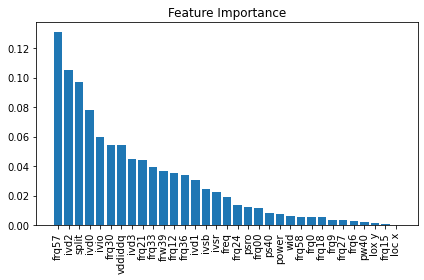

In [ ]:
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
print(X.columns[sorted_indices])

Index(['frq57', 'ivd2', 'split', 'ivd0', 'ivio', 'frq30', 'vddiddq', 'ivd3',
       'frq21', 'frq33', 'frw39', 'frq12', 'frq36', 'ivd1', 'ivsb', 'ivsr',
       'freq', 'frq24', 'psro', 'frq00', 'ps40', 'power', 'wid', 'frq58',
       'frq0', 'frq18', 'frq9', 'frq27', 'frq6', 'pw40', 'lox y', 'frq15',
       'loc x'],
      dtype='object')


In [ ]:
#The 2 most important features
X = df[['ivd2','frq57']]


In [ ]:
#Redoing the train test split for the 2 most important features
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(x_train,y_train,test_size=0.25, random_state=42)

In [ ]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_validate)


In [ ]:
cm=confusion_matrix(y_validate, y_pred)
print('Two feature Naive:')
print("Confusion Matrix: ")
print(cm)
print("Accuracy: ",accuracy_score(y_validate,y_pred))
print("f1 Score: ",f1_score(y_validate, y_pred, average='macro'))
print("Precision: ",precision_score(y_validate, y_pred, average='macro'))

Two feature Naive:
Confusion Matrix: 
[[15  1  0]
 [ 0 15  0]
 [ 2  0  1]]
Accuracy:  0.9117647058823529
f1 Score:  0.7922776148582601
Precision:  0.9399509803921569


GIVEN THE RESULLTS OF THE 32 FEATURE CLASSIFIER WERE AS FOLLOWS:

Confusion Matrix: 

[ 16  0  0 ]

[ 0 15  0 ]

[ 1  0  2 ]

Accuracy:  0.9705882352941176

f1 Score:  0.9232323232323232

Precision:  0.9803921568627452

THE TWO FEATURE CLASSIFIER SEEMS TO BE SUFFICIENT ENOUGH FOR CLASSIFYING IN THIS CASE. REDUCING 30 FEATURES AND STILL MAINTAINING VALIDATION ACCURACY AND PRECISIOIN OVER 90% SEEMS BENIFICIAL FOR MAKING THE MODEL MUCH MORE INTERPRETABLE BY ONLY HAVING TWO FEATURES. 